In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [12]:
# the number of observations and columns are
num_observations = 80000
num_columns = 10 
#columns name
columns = [
    "Movie_ID","Title",
    "Year","Genre",
    "Director", "Budget_Million",
    "BoxOffice_Million","Runtime_Minutes", 
    "Rating","Award_Won" 
]

In [13]:
np.random.seed(42)
data = {
    "Movie_ID": ["MOV" + str(i).zfill(6) for i in range(1, num_observations + 1)],
    "Title": ["Adventure Film " + str(i) for i in range(1, num_observations + 1)],
    "Year": np.random.randint(1980, 2024, num_observations),
    "Genre": np.random.choice(["Adventure", "Action", "Fantasy", "Sci-Fi"], num_observations, p=[0.7, 0.1, 0.1, 0.1]),
    "Director": np.random.choice(["Director A", "Director B", "Director C", "Director D", "Director E"], num_observations),
    "Budget_Million": np.random.normal(100, 50, num_observations).clip(10, 300),
    "BoxOffice_Million": np.random.normal(200, 100, num_observations).clip(5, 1000),
    "Runtime_Minutes": np.where(
        np.random.choice(["Adventure", "Action", "Fantasy", "Sci-Fi"], num_observations, p=[0.7, 0.1, 0.1, 0.1]) == "Adventure",
        np.random.normal(130, 15, num_observations).clip(80, 180),
        np.random.normal(120, 10, num_observations).clip(80, 180)
    ),
    "Rating": np.random.uniform(1, 10, num_observations).round(1),
    "Award_Won": np.random.choice(["Yes", "No"], num_observations, p=[0.3, 0.7])
}

In [14]:
# Create DataFrame
dataset = pd.DataFrame(data)
dataset.to_csv("adventure_movies_dataset.csv", index=False)

In [15]:
# Load the dataset
data = pd.read_csv("movies_data_analysis.csv")

In [16]:
data.head()

,Movie_ID,Title,Year,Genre,Director,Budget_Million,BoxOffice_Million,Runtime_Minutes,Rating,Award_Won
0,MOV000001,Adventure Film 1,2018,Adventure,Director A,82.078031,441.753825,114.155228,5.0,Yes
1,MOV000002,Adventure Film 2,2008,Adventure,Director A,108.957053,86.884441,114.693611,4.7,Yes
2,MOV000003,Adventure Film 3,1994,Adventure,Director C,37.795688,87.241374,113.393664,9.7,No
3,MOV000004,Adventure Film 4,2022,Sci-Fi,Director D,120.161778,231.401774,106.589559,6.3,No
4,MOV000005,Adventure Film 5,1987,Adventure,Director C,132.718911,70.943526,142.044640,6.5,Yes


In [17]:
#  basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_ID           80000 non-null  object 
 1   Title              80000 non-null  object 
 2   Year               80000 non-null  int64  
 3   Genre              80000 non-null  object 
 4   Director           80000 non-null  object 
 5   Budget_Million     80000 non-null  float64
 6   BoxOffice_Million  80000 non-null  float64
 7   Runtime_Minutes    80000 non-null  float64
 8   Rating             80000 non-null  float64
 9   Award_Won          80000 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.1+ MB
None


In [18]:
#statistics for numerical columns
print(data.describe())

               Year  Budget_Million  BoxOffice_Million  Runtime_Minutes  \
count  80000.000000    80000.000000       80000.000000     80000.000000   
mean    2001.509425      100.703075         200.406060       126.957796   
std       12.660702       48.357263          97.593747        14.465309   
min     1980.000000       10.000000           5.000000        80.000000   
25%     1991.000000       66.286950         132.262816       116.967810   
50%     2002.000000      100.072418         199.069221       126.128505   
75%     2012.000000      133.697708         266.389786       136.303363   
max     2023.000000      289.109392         621.936634       180.000000   

             Rating  
count  80000.000000  
mean       5.498771  
std        2.593778  
min        1.000000  
25%        3.300000  
50%        5.500000  
75%        7.700000  
max       10.000000  


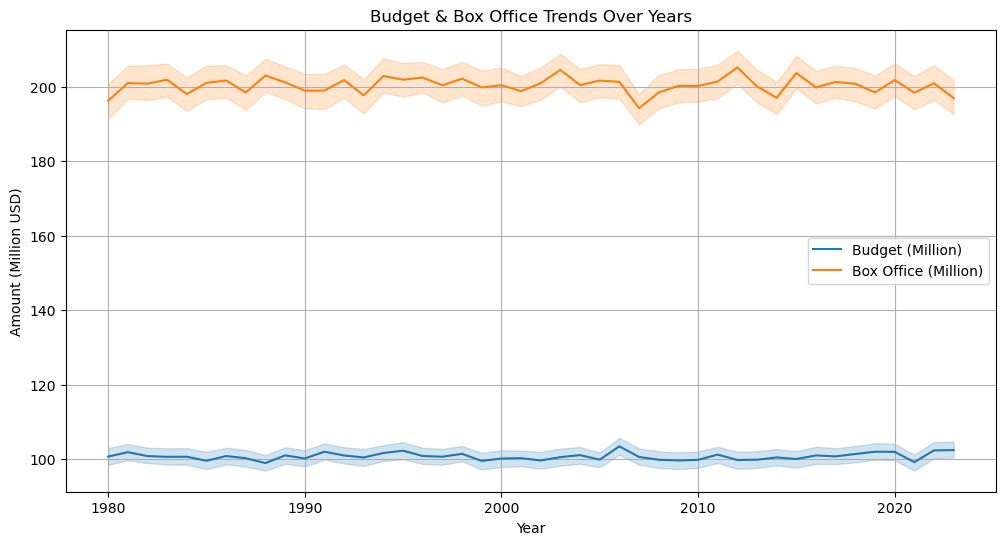

In [48]:
# line-graph
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Budget_Million", data=data, label="Budget (Million)")
sns.lineplot(x="Year", y="BoxOffice_Million", data=data, label="Box Office (Million)")
plt.title("Budget & Box Office Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Amount (Million USD)")
plt.legend()
plt.grid()
plt.show()


In [19]:
# count unique genres
print(data["Genre"].value_counts())

Genre
Adventure    56110
Sci-Fi        8021
Fantasy       7951
Action        7918
Name: count, dtype: int64


In [20]:
# average box revenue
print("Average Box Office Revenue (Million USD):"
      , data["BoxOffice_Million"].mean())

Average Box Office Revenue (Million USD): 200.40606034174928


In [21]:
# maximum budget for movie
max_budget = data["Budget_Million"].max()
print("Maximum Budget (Million USD):", max_budget)
print(data[data["Budget_Million"] == max_budget])

Maximum Budget (Million USD): 289.10939244983206
        Movie_ID                 Title  Year      Genre    Director  \
36373  MOV036374  Adventure Film 36374  2020  Adventure  Director A   

       Budget_Million  BoxOffice_Million  Runtime_Minutes  Rating Award_Won  
36373      289.109392         243.903081        116.06643     1.3        No  


In [22]:
#count award
award_count = data["Award_Won"].value_counts()
print("Movies with Awards:")
print(award_count)

Movies with Awards:
Award_Won
No     56148
Yes    23852
Name: count, dtype: int64


In [23]:
# median of runtime
print("Median Runtime (Minutes):", data["Runtime_Minutes"].median())

Median Runtime (Minutes): 126.12850455408491


In [24]:
#top 5 director movies
top_directors = data["Director"].value_counts().head(5)
print("Top 5 Directors by Movie Count:")
print(top_directors)

Top 5 Directors by Movie Count:
Director
Director E    16051
Director B    16050
Director D    16007
Director C    15992
Director A    15900
Name: count, dtype: int64


In [25]:
# year with  highest average box office revenue
yearly_revenue = data.groupby("Year")["BoxOffice_Million"].mean()
highest_year = yearly_revenue.idxmax()
highest_revenue = yearly_revenue.max()
print("Year with Highest Average Box Office Revenue:", highest_year)
print("Highest Average Revenue (Million USD):", highest_revenue)

Year with Highest Average Box Office Revenue: 2012
Highest Average Revenue (Million USD): 205.1806124573583


In [26]:
print("Rating Distribution:")
print(data["Rating"].value_counts(bins=10, sort=False))

Rating Distribution:
(0.99, 1.9]    8340
(1.9, 2.8]     8038
(2.8, 3.7]     8126
(3.7, 4.6]     8009
(4.6, 5.5]     8007
(5.5, 6.4]     7985
(6.4, 7.3]     8044
(7.3, 8.2]     7919
(8.2, 9.1]     7990
(9.1, 10.0]    7542
Name: count, dtype: int64


In [27]:
# percentage of movies by genre
genre_percentage = data["Genre"].value_counts(normalize=True) * 100
print("Percentage of Movies by Genre:")
print(genre_percentage)

Percentage of Movies by Genre:
Genre
Adventure    70.13750
Sci-Fi       10.02625
Fantasy       9.93875
Action        9.89750
Name: proportion, dtype: float64


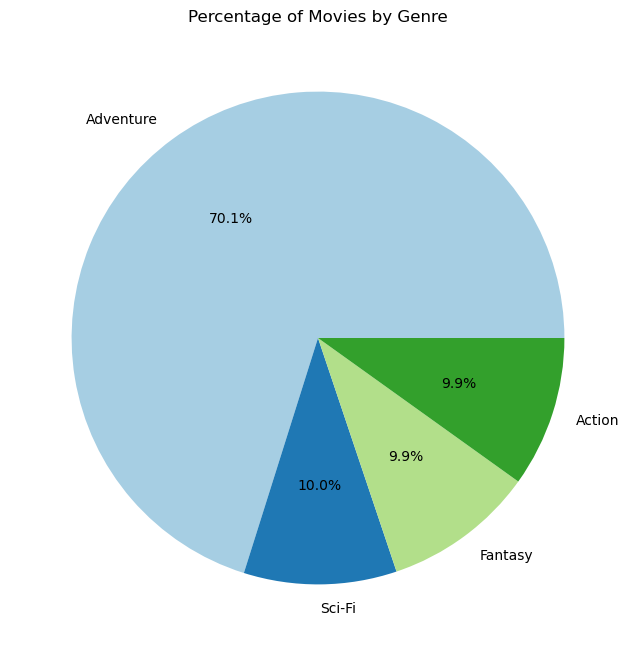

In [41]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(genre_percentage, labels=genre_percentage.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
#  title
plt.title("Percentage of Movies by Genre")
# Show the chart
plt.show()


In [28]:
# percentage of movies winning awards
award_percentage = (data["Award_Won"].value_counts(normalize=True) * 100).loc["Yes"]
print("Percentage of Movies Winning Awards:", award_percentage)

Percentage of Movies Winning Awards: 29.815


In [29]:
print("Genre-wise Award-Winning Movie Counts:")
print(data[data["Award_Won"] == "Yes"].groupby("Genre").size())

Genre-wise Award-Winning Movie Counts:
Genre
Action        2504
Adventure    16585
Fantasy       2363
Sci-Fi        2400
dtype: int64


In [31]:
# box office revenue range segmentation
print("Box Office Revenue Range Segmentation:")
data["Revenue_Range"] = pd.cut(data["BoxOffice_Million"], bins=[0, 100, 300, 600, 1000], labels=["Low","Moderate", "High", "Blockbuster"])
print(data["Revenue_Range"].value_counts())

Box Office Revenue Range Segmentation:
Revenue_Range
Moderate       54669
Low            12690
High           12640
Blockbuster        1
Name: count, dtype: int64


In [32]:
# award-winning trends over years
print("Award-Winning Trends Over Years:")
award_trend = data[data["Award_Won"] == "Yes"].groupby("Year").size()
print(award_trend)

Award-Winning Trends Over Years:
Year
1980    559
1981    538
1982    575
1983    547
1984    555
1985    529
1986    529
1987    532
1988    534
1989    549
1990    534
1991    540
1992    571
1993    531
1994    525
1995    537
1996    602
1997    551
1998    574
1999    519
2000    540
2001    536
2002    606
2003    545
2004    522
2005    598
2006    540
2007    591
2008    525
2009    539
2010    519
2011    533
2012    500
2013    537
2014    493
2015    578
2016    532
2017    528
2018    537
2019    513
2020    527
2021    529
2022    496
2023    557
dtype: int64


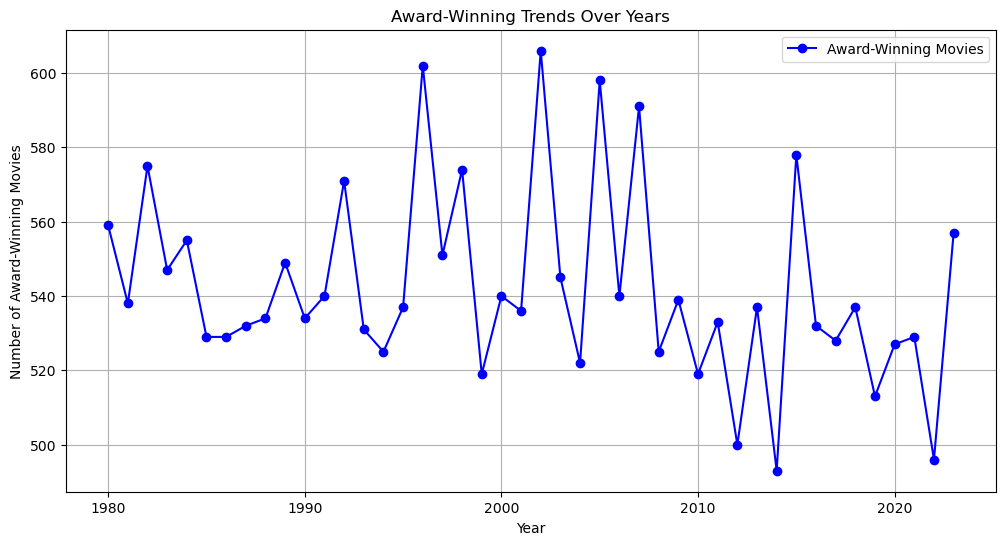

In [46]:
# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(award_trend.index, award_trend.values, marker="o", linestyle="-", color="blue", label="Award-Winning Movies")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Award-Winning Movies")
plt.title("Award-Winning Trends Over Years")
plt.legend()
plt.grid(True)
# Show the chart
plt.show()


In [33]:
# rating distribution  by genre
print("Rating Distribution by Genre:")
print(data.groupby("Genre")["Rating"].describe())

Rating Distribution by Genre:
             count      mean       std  min  25%  50%  75%   max
Genre                                                           
Action      7918.0  5.540566  2.586453  1.0  3.3  5.6  7.8  10.0
Adventure  56110.0  5.492836  2.596140  1.0  3.2  5.5  7.7  10.0
Fantasy     7951.0  5.457024  2.584686  1.0  3.3  5.4  7.7  10.0
Sci-Fi      8021.0  5.540419  2.592894  1.0  3.3  5.6  7.8  10.0


C:\Users\PMLS\AppData\Local\Temp\ipykernel_3452\2498218666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Rating", data=data, palette="coolwarm")


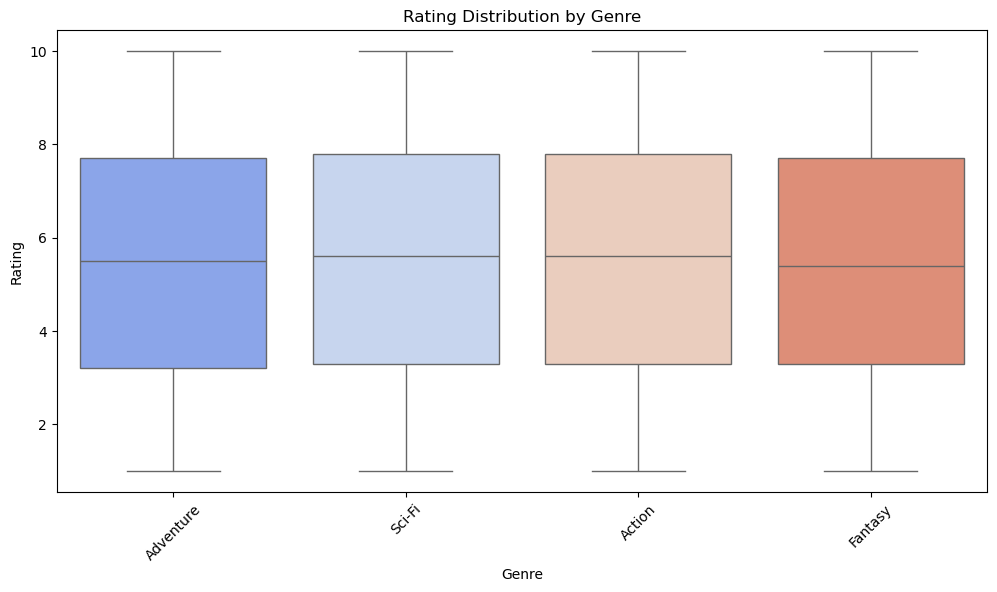

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Genre", y="Rating", data=data, palette="coolwarm")

# labels and title
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.title("Rating Distribution by Genre")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the graph
plt.show()


In [34]:
# Runtime impact on box office revenue
print("Runtime Impact on Box Office Revenue:")
runtime_revenue_corr = data["Runtime_Minutes"].corr(data["BoxOffice_Million"])
print("Correlation between Runtime and Box Office Revenue:", runtime_revenue_corr)

Runtime Impact on Box Office Revenue:
Correlation between Runtime and Box Office Revenue: -0.002474423353551728


In [37]:
# Box office performance by decade
print("Box Office Performance by Decade:")
data["Decade"] = (data["Year"] // 10) * 10
decade_performance = data.groupby("Decade")["BoxOffice_Million"].mean()
print(decade_performance)

Box Office Performance by Decade:
Decade
1980    200.347302
1990    200.740989
2000    200.091444
2010    200.823270
2020    199.472841
Name: BoxOffice_Million, dtype: float64


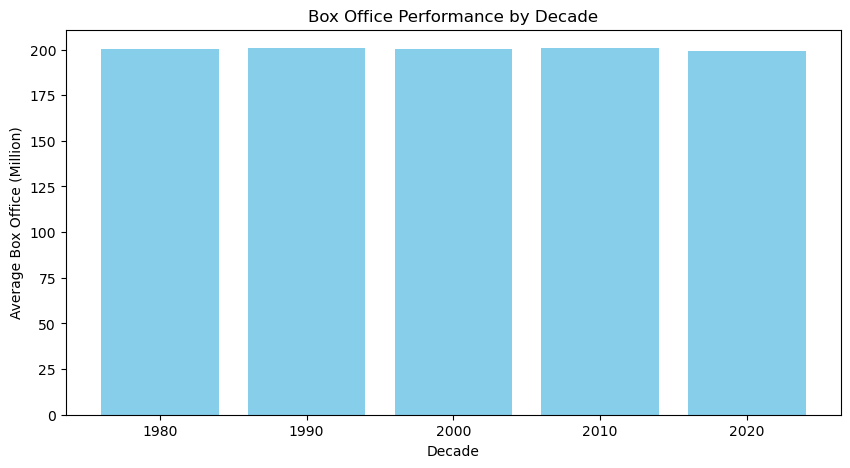

In [39]:
# Bar  graph
plt.figure(figsize=(10, 5))
plt.bar(decade_performance.index, decade_performance.values, width=8, color='skyblue')

# labels and title
plt.xlabel("Decade")
plt.ylabel("Average Box Office (Million)")
plt.title("Box Office Performance by Decade")
plt.xticks(decade_performance.index)  

# Show the graph
plt.show()

In [50]:
# Most common budget range
print("Most Common Budget Range:")
data["Budget_Range"] = pd.cut(data["Budget_Million"], bins=[0, 50, 100, 200, 300], labels=["Low","Moderate", "High", "Very High"])
print(data["Budget_Range"].value_counts())

Most Common Budget Range:
Budget_Range
High         38253
Moderate     27278
Low          12674
Very High     1795
Name: count, dtype: int64
